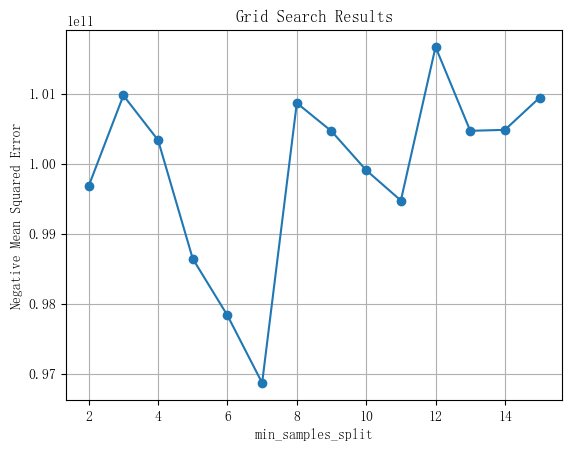

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams['font.family'] = 'SimSun'
data = pd.read_csv('../newData.csv',encoding='gbk')

# 提取特征和标签
features = data[[ '月份', '日期', '星期几', '季节', '节假日']]  # 根据您的数据集修改特征列
labels = data['航线金额']  # 根据您的数据集修改目标变量列

# 创建随机森林回归模型
model = RandomForestRegressor()

# 定义网格搜索的参数范围
param_grid = {'min_samples_split': [2,3,4, 5,6,7,8,9, 10,11,12,13,14,15]}

# 创建网格搜索对象
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, error_score='raise')

# 执行网格搜索
grid_search.fit(features, labels)

# 提取网格搜索结果
param_values = [params['min_samples_split'] for params in grid_search.cv_results_['params']]
mean_scores = -grid_search.cv_results_['mean_test_score']

# 绘制图形
plt.plot(param_values, mean_scores, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Negative Mean Squared Error')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()